# Exploratory analysis

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from datetime import datetime
import numpy as np

import warnings
warnings.simplefilter('ignore')

from utils import get_dataframe

In [2]:
# load data
data = get_dataframe(solar_noon_altitudes=True)
data.head()

Datum und Uhrzeit  Gesamtanlage[kWh]    FX   FM   RSK  RSKF  SDK  SHK_TAG  \
0        01.01.2019            1.71013  15.2  4.8   1.6     8  0.0        0   
1        02.01.2019            0.02722  17.0  6.0   0.6     8  0.7        0   
2        03.01.2019            0.49862  10.1  4.1   0.0     8  2.9        0   
3        04.01.2019            0.00908  12.1  4.2   5.0     8  0.0        0   
4        05.01.2019            0.00005  16.1  6.5  22.1     8  0.0        5   

    NM  VPM     PM  TMK   UPM  TXK  TNK  TGK  Solar noon altitudes  
0  7.9  7.1  965.6  4.1  87.0  5.2  2.7  1.9              0.328030  
1  7.0  5.0  965.5  0.4  78.0  3.2 -2.1 -4.8              0.329488  
2  7.4  3.9  971.2 -1.9  73.0 -0.6 -3.1 -4.4              0.331079  
3  7.7  4.8  970.3 -1.1  85.0 -0.3 -1.7 -2.2              0.332803  
4  7.6  5.9  963.8  0.0  96.0  1.0 -0.9 -0.8              0.334658

In [3]:
# drop 29.02.2020 because there is no value in the other years to compare
data = data.drop(data[data["Datum und Uhrzeit"] == "29.02.2020"].index).reset_index()
data = data.drop("index", axis=1)

# add column for year, month and day of the year
# convert "Datum und Uhrzeit" column to date
data["Date"] = [datetime.strptime(data["Datum und Uhrzeit"][i], "%d.%m.%Y") for i in range(len(data))]
data["Year"] = data["Date"].dt.year
data["Day of year"] = data["Date"].dt.dayofyear
data["Month"] = data["Date"].dt.month
data = data.drop("Date", axis=1)

## Energy production

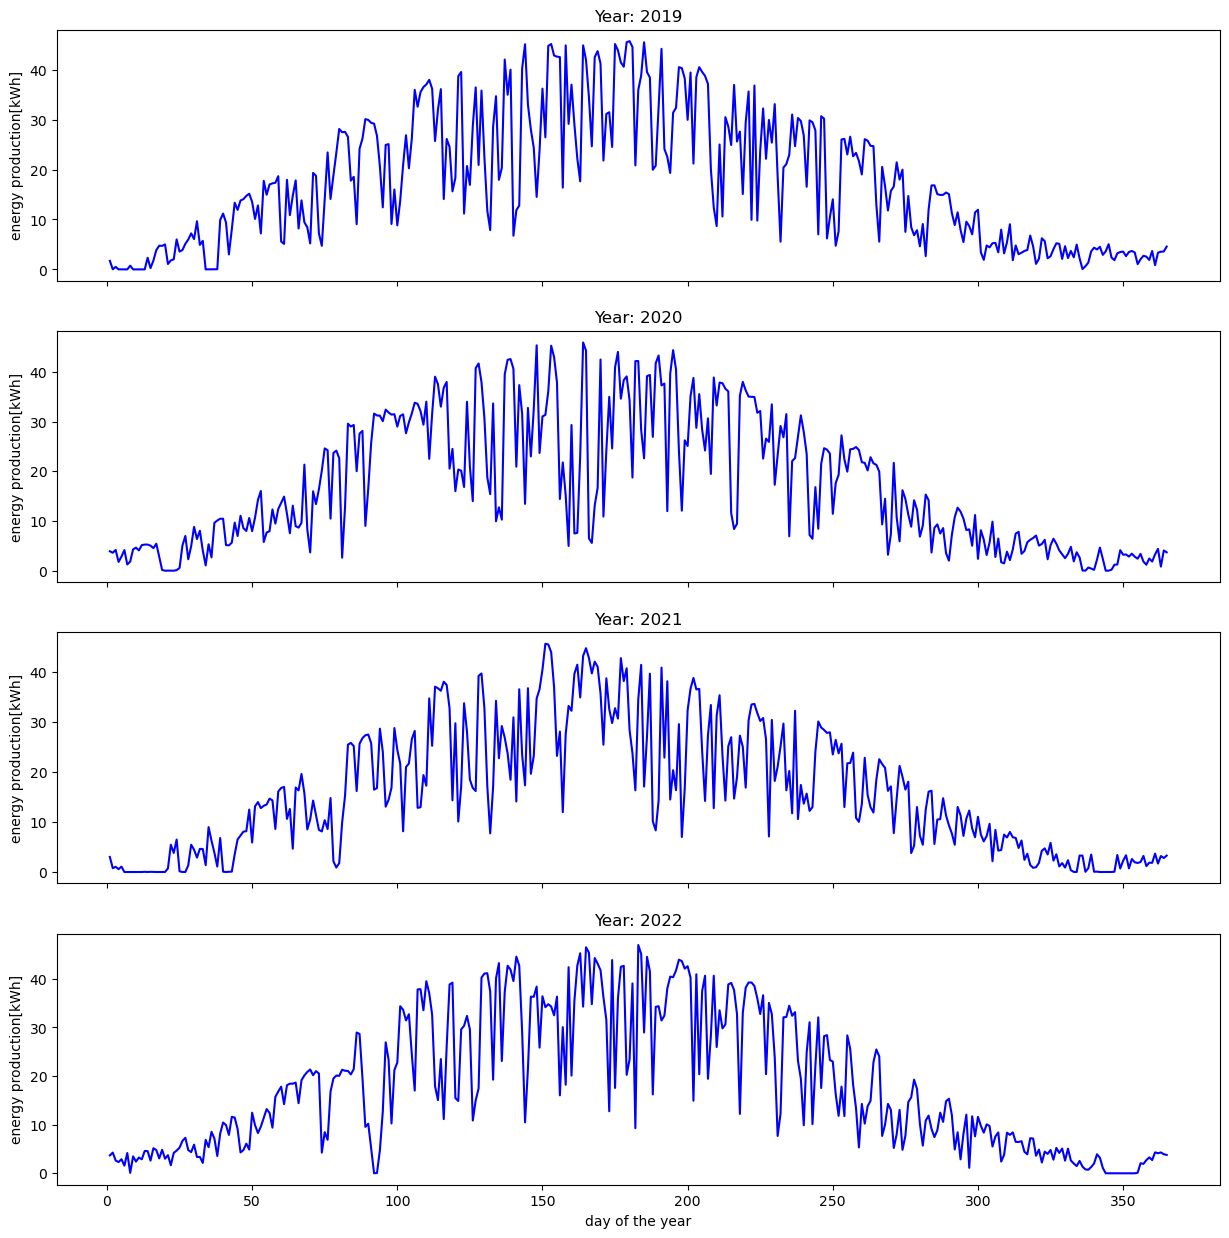

In [4]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    year_data = data[data["Year"] == year]

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1
    
axes[3].set_xlabel("day of the year")
plt.show()

Note: There are days in the winter when there is no production at all. The reason for this is that if there is snow on the modules, there will be no energy production. \

We expect production to be primarily influenced by sunshine hours. There is also a clear general trend each year that there is much more production in the summer. We believe this is because in the summer the sun hits the modules at a steeper angle. For this reason, we will next look at energy production along with sunshine hours and solar noon altitude.

## Energy production and sunshine for every day of the year

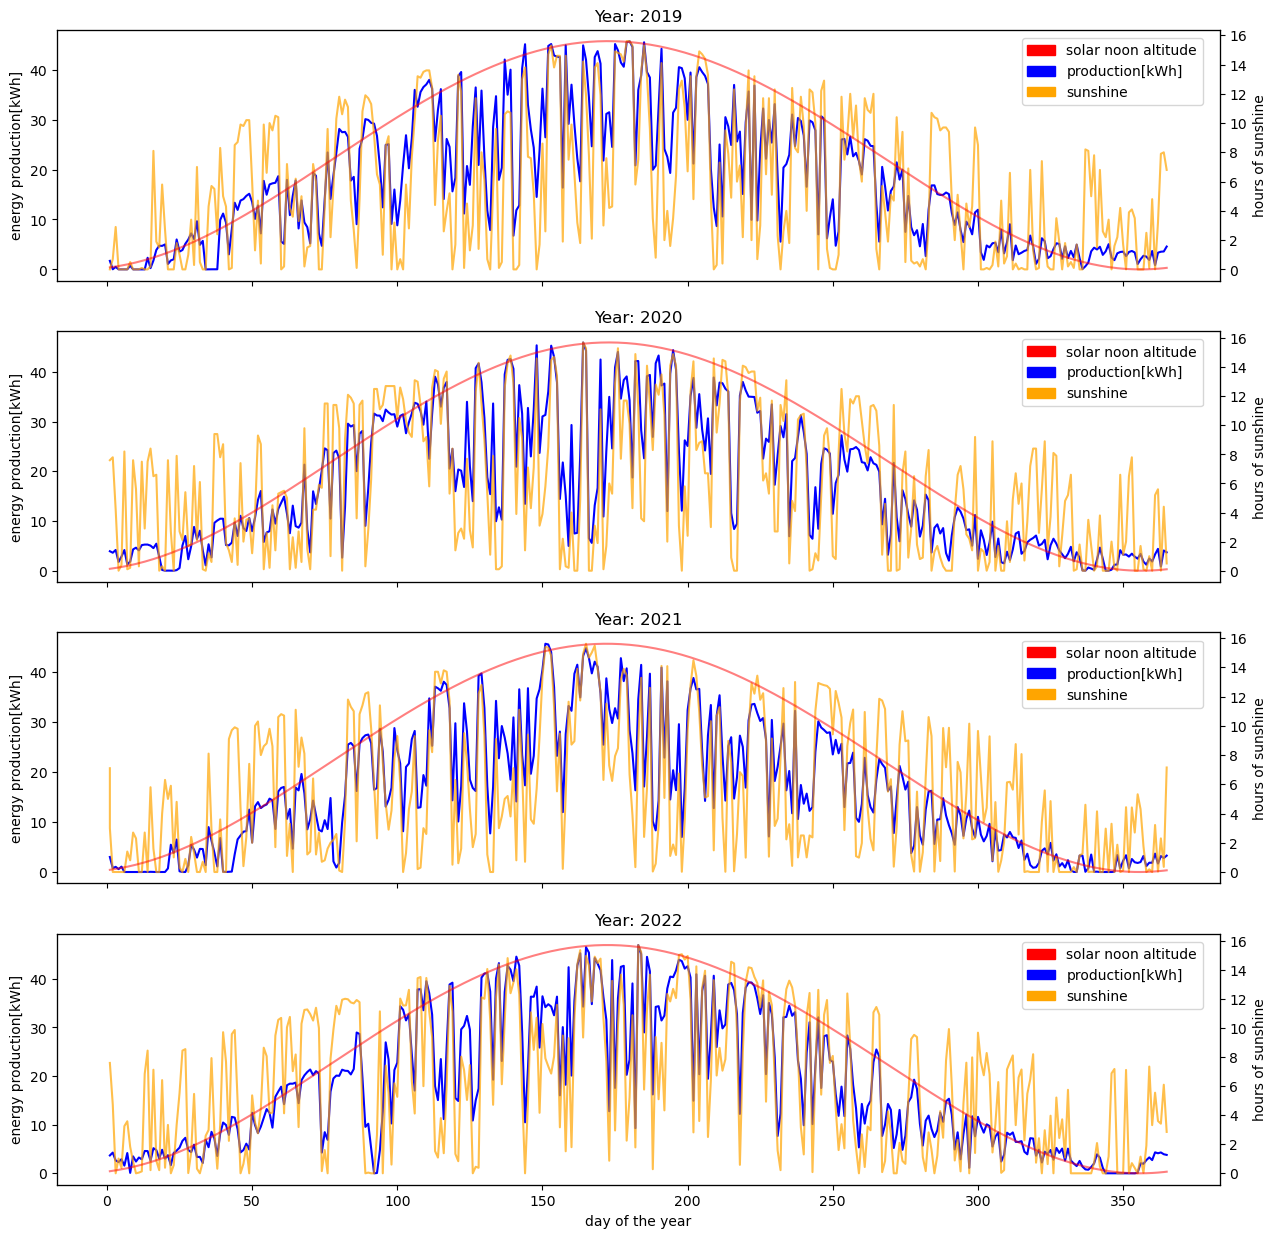

In [5]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    # use different y axis
    ax2 = ax.twinx()
    ax3 = ax.twinx()
    year_data = data[data["Year"] == year]

    # plot hours of sunshine
    ax2.plot(
        year_data["Day of year"],
        year_data["SDK"],
        color="orange",
        alpha=0.7
    )
    ax2.set_ylabel("hours of sunshine")
    
    # plot solar noon altitudes
    ax3.plot(
        year_data["Day of year"],
        year_data["SNA"],
        color="red",
        alpha=0.5
    )
    ax3.set_yticks([])

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1

    # legend
    colors = {'solar noon altitude': 'red', 'production[kWh]': 'blue', 'sunshine': 'orange'}
    patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
    ax.legend(handles=patch, loc=(0.83,0.7))
    
axes[3].set_xlabel("day of the year")
plt.show()

## Look at some other features
### Energy production and relative humidity

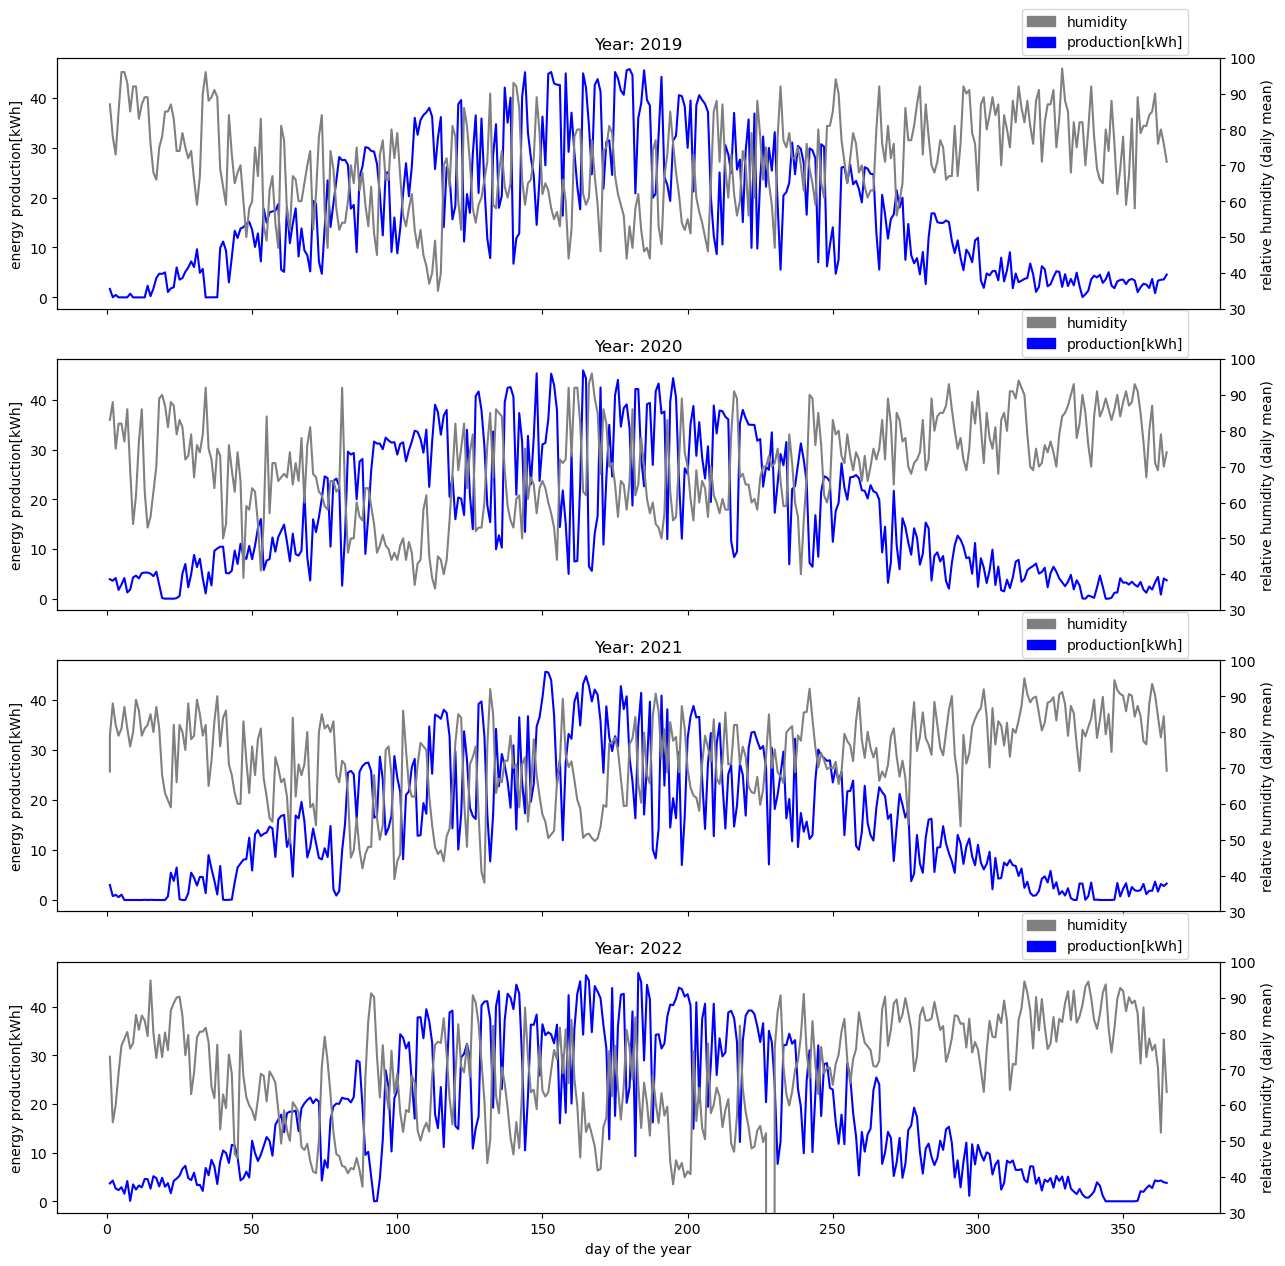

In [6]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    # use different y axis
    ax2 = ax.twinx()
    year_data = data[data["Year"] == year]

    # plot humidity
    ax2.plot(
        year_data["Day of year"],
        year_data["UPM"],
        color="gray",
        #alpha=0.5
    )
    ax2.set_ylabel("relative humidity (daily mean)")
    ax2.set_ylim(30,100)

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1

    # legend
    colors = {'humidity': 'gray', 'production[kWh]': 'blue'}
    patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
    ax.legend(handles=patch, loc=(0.83,1.01))
    
axes[3].set_xlabel("day of the year")
plt.show()

Two days have value -999.0 for humidity. These are missing values. 

In [7]:
data[data["UPM"] < 30]

Datum und Uhrzeit  Gesamtanlage[kWh]    FX   FM  RSK  RSKF     SDK  \
1322        16.08.2022           35.04415   6.1  1.9  0.0     0  12.500   
1323        17.08.2022           32.73360  12.6  1.8  1.9     6  11.583   

      SHK_TAG   NM    VPM      PM   TMK    UPM   TXK   TNK   TGK  \
1322        0  1.5 -999.0  950.96  22.8 -999.0  30.0  17.0  14.0   
1323        0  4.9 -999.0  950.65  24.1 -999.0  31.9  16.1  13.0   

      Solar noon altitudes  Year  Day of year  Month  
1322              0.970549  2022          228      8  
1323              0.965016  2022          229      8

### Energy production and average temperature

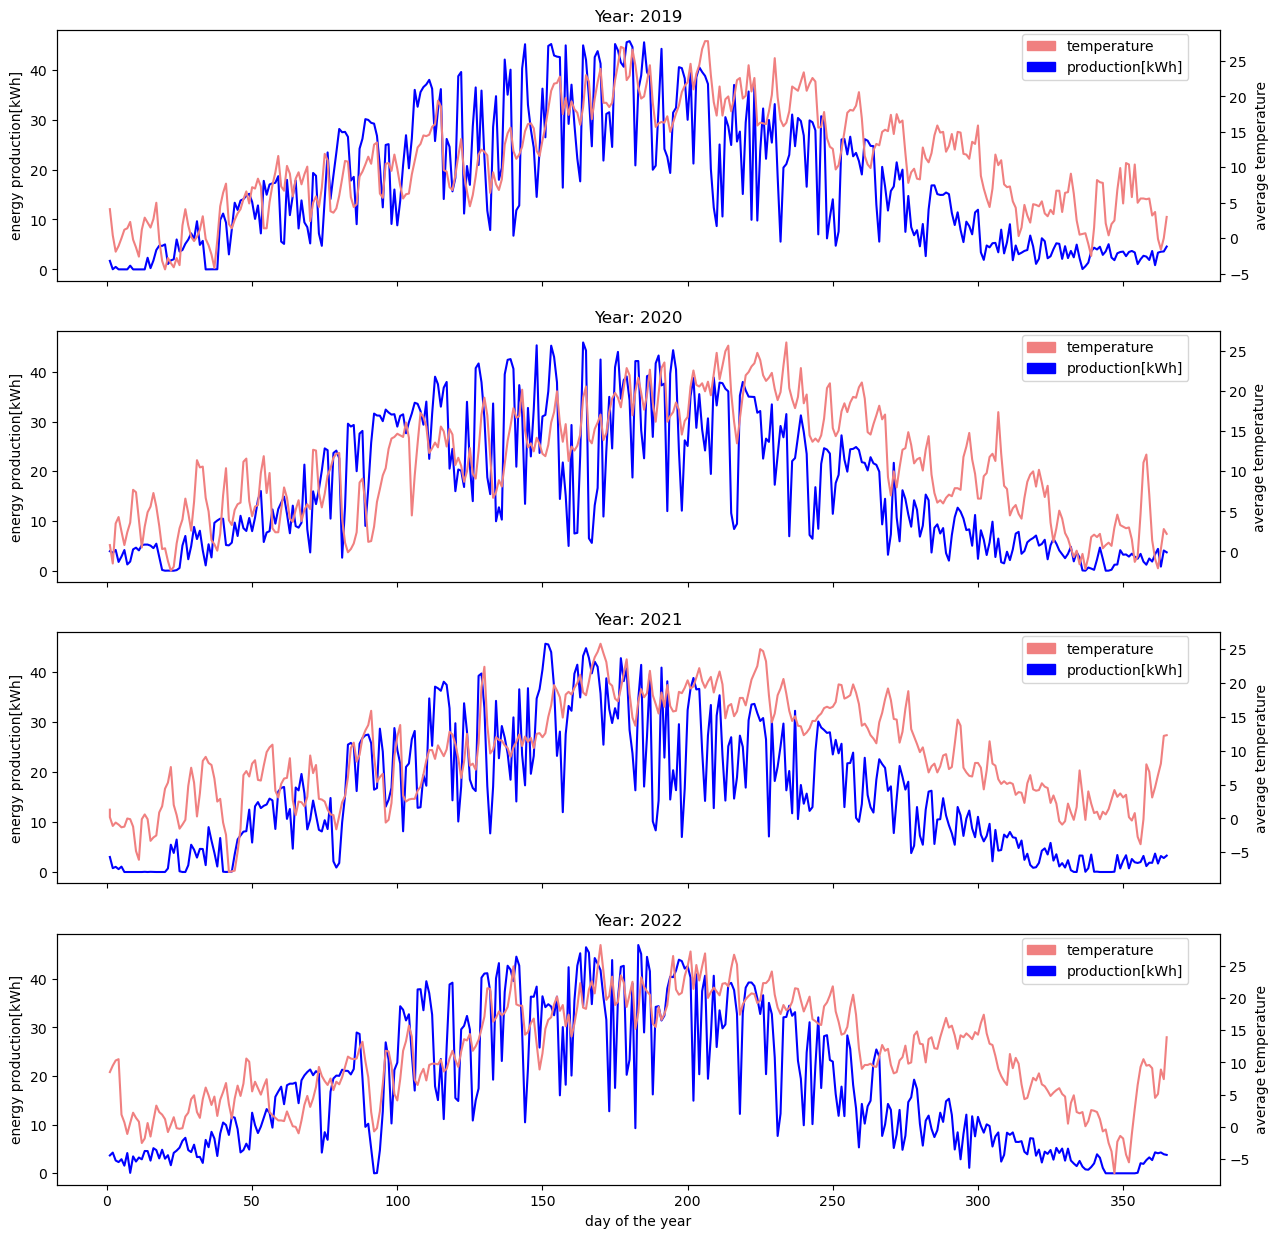

In [8]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    # use different y axis
    ax2 = ax.twinx()
    year_data = data[data["Year"] == year]

    # plot temperature
    ax2.plot(
        year_data["Day of year"],
        year_data["TMK"],
        color="lightcoral",
        #alpha=0.5
    )
    ax2.set_ylabel("average temperature")

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1

    # legend
    colors = {'temperature': 'lightcoral', 'production[kWh]': 'blue'}
    patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
    ax.legend(handles=patch, loc=(0.83,0.8))
    
axes[3].set_xlabel("day of the year")
plt.show()

### Energy production and rainfall

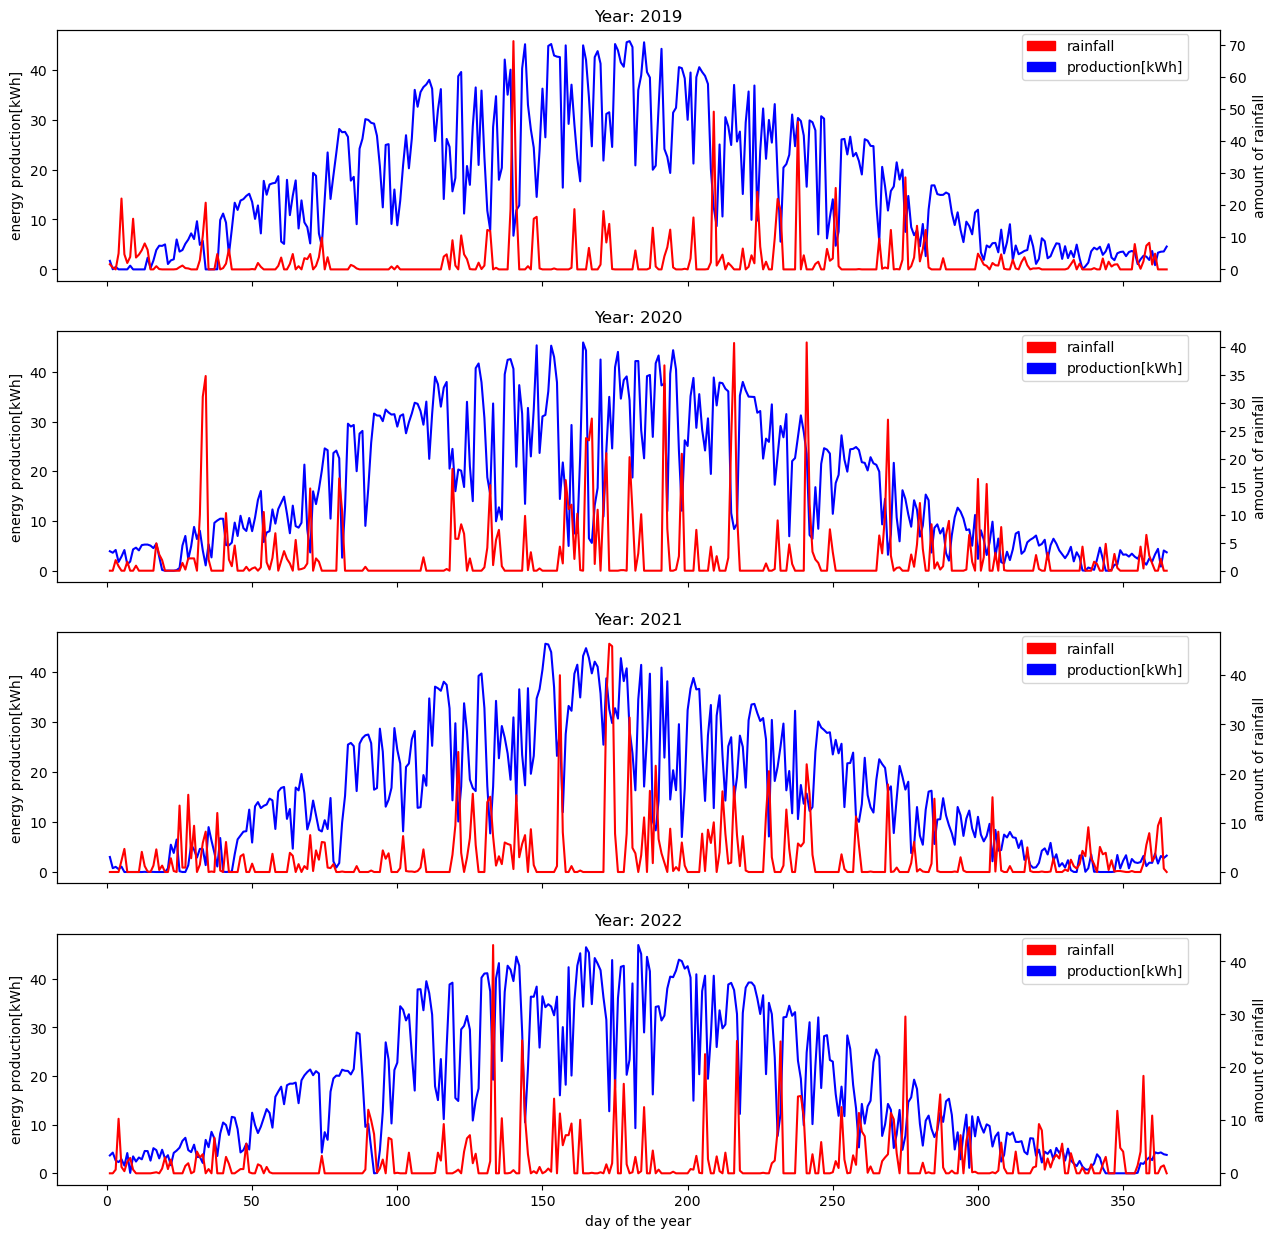

In [9]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    # use different y axis
    ax2 = ax.twinx()
    year_data = data[data["Year"] == year]

    # plot temperature
    ax2.plot(
        year_data["Day of year"],
        year_data["RSK"],
        color="red",
        #alpha=0.5
    )
    ax2.set_ylabel("amount of rainfall")

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        year_data["Gesamtanlage[kWh]"],
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1

    # legend
    colors = {'rainfall': 'red', 'production[kWh]': 'blue'}
    patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
    ax.legend(handles=patch, loc=(0.83,0.8))
    
axes[3].set_xlabel("day of the year")
plt.show()

## Plot the production per month

In a yearly view, it is difficult to distinguish individual days, so it is difficult to see a pattern that is not obvious. We can look at each month individually.

2019


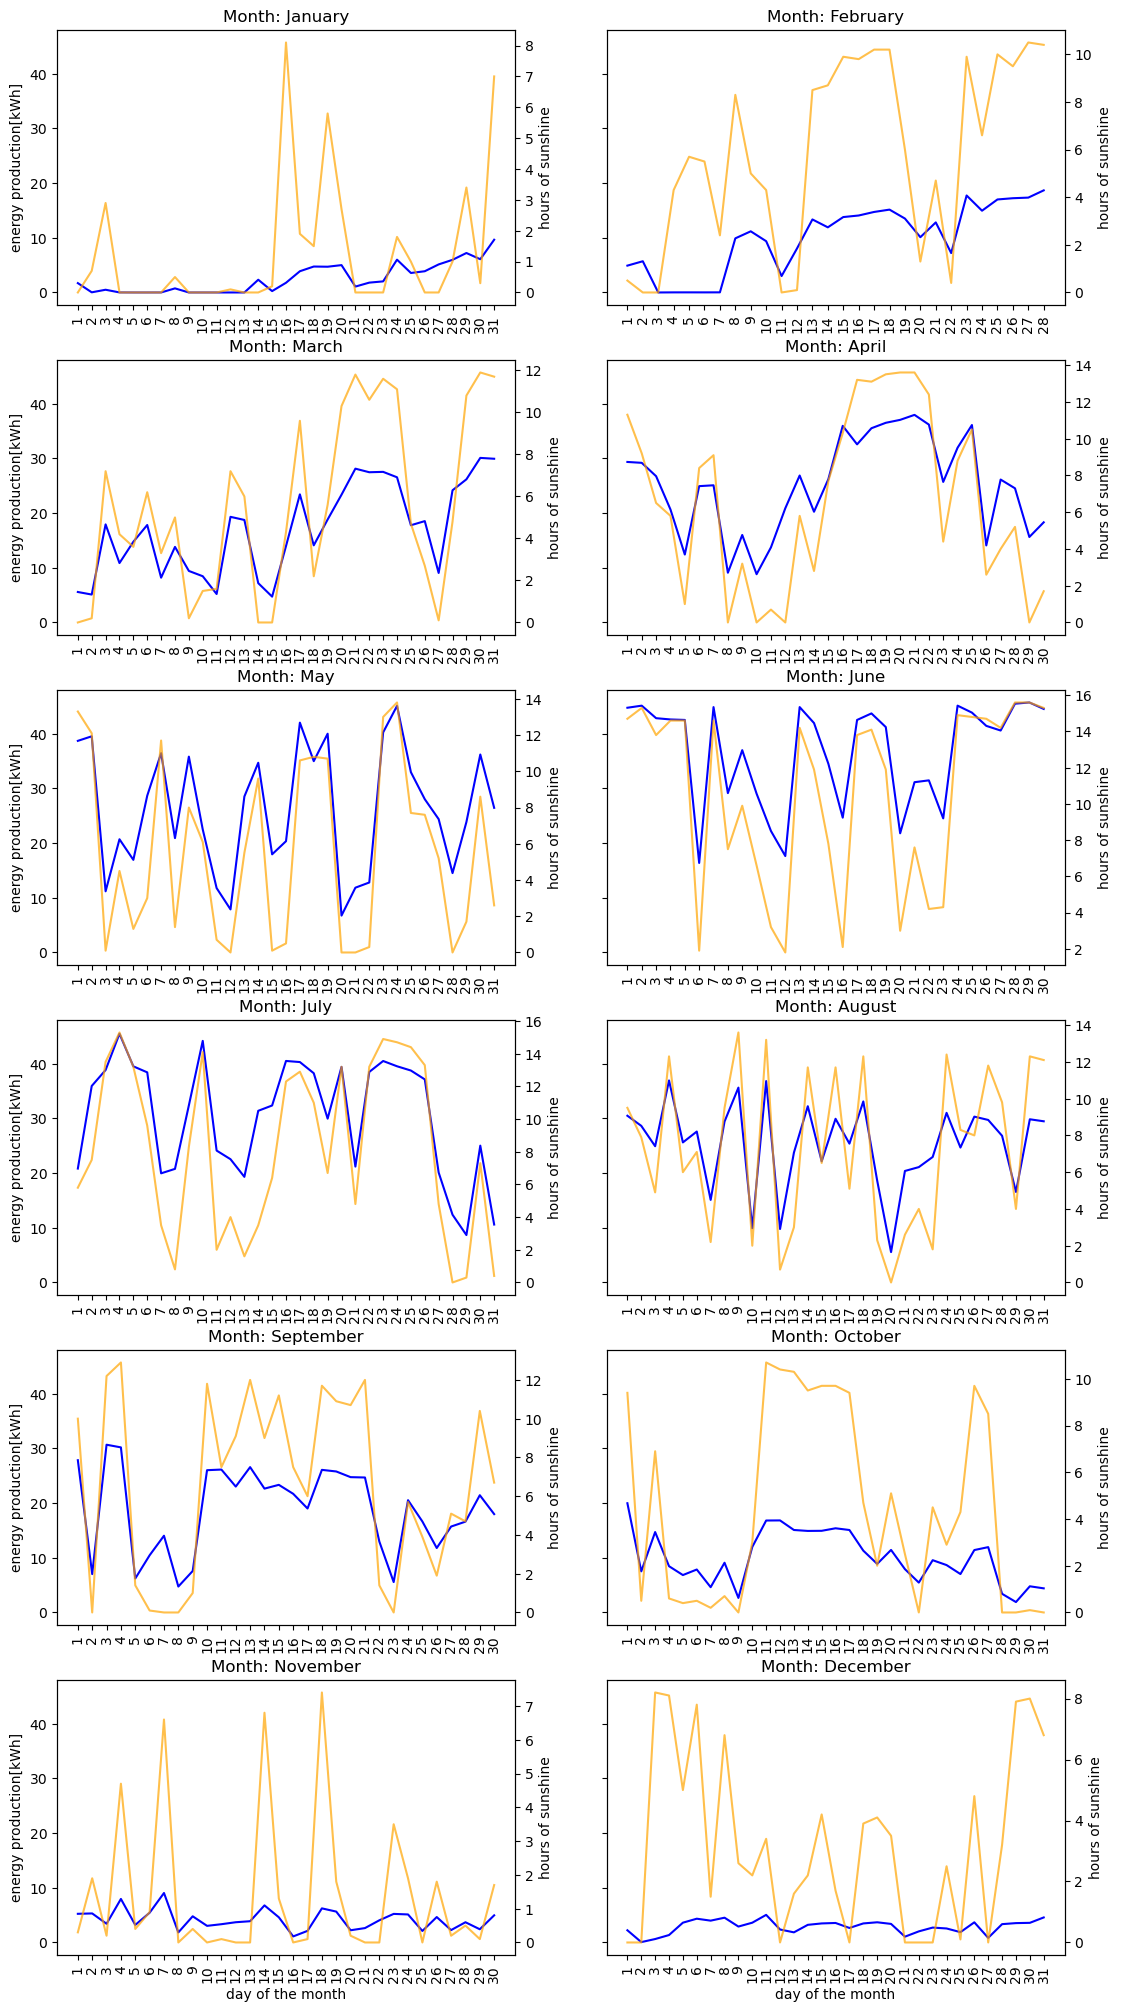

2020


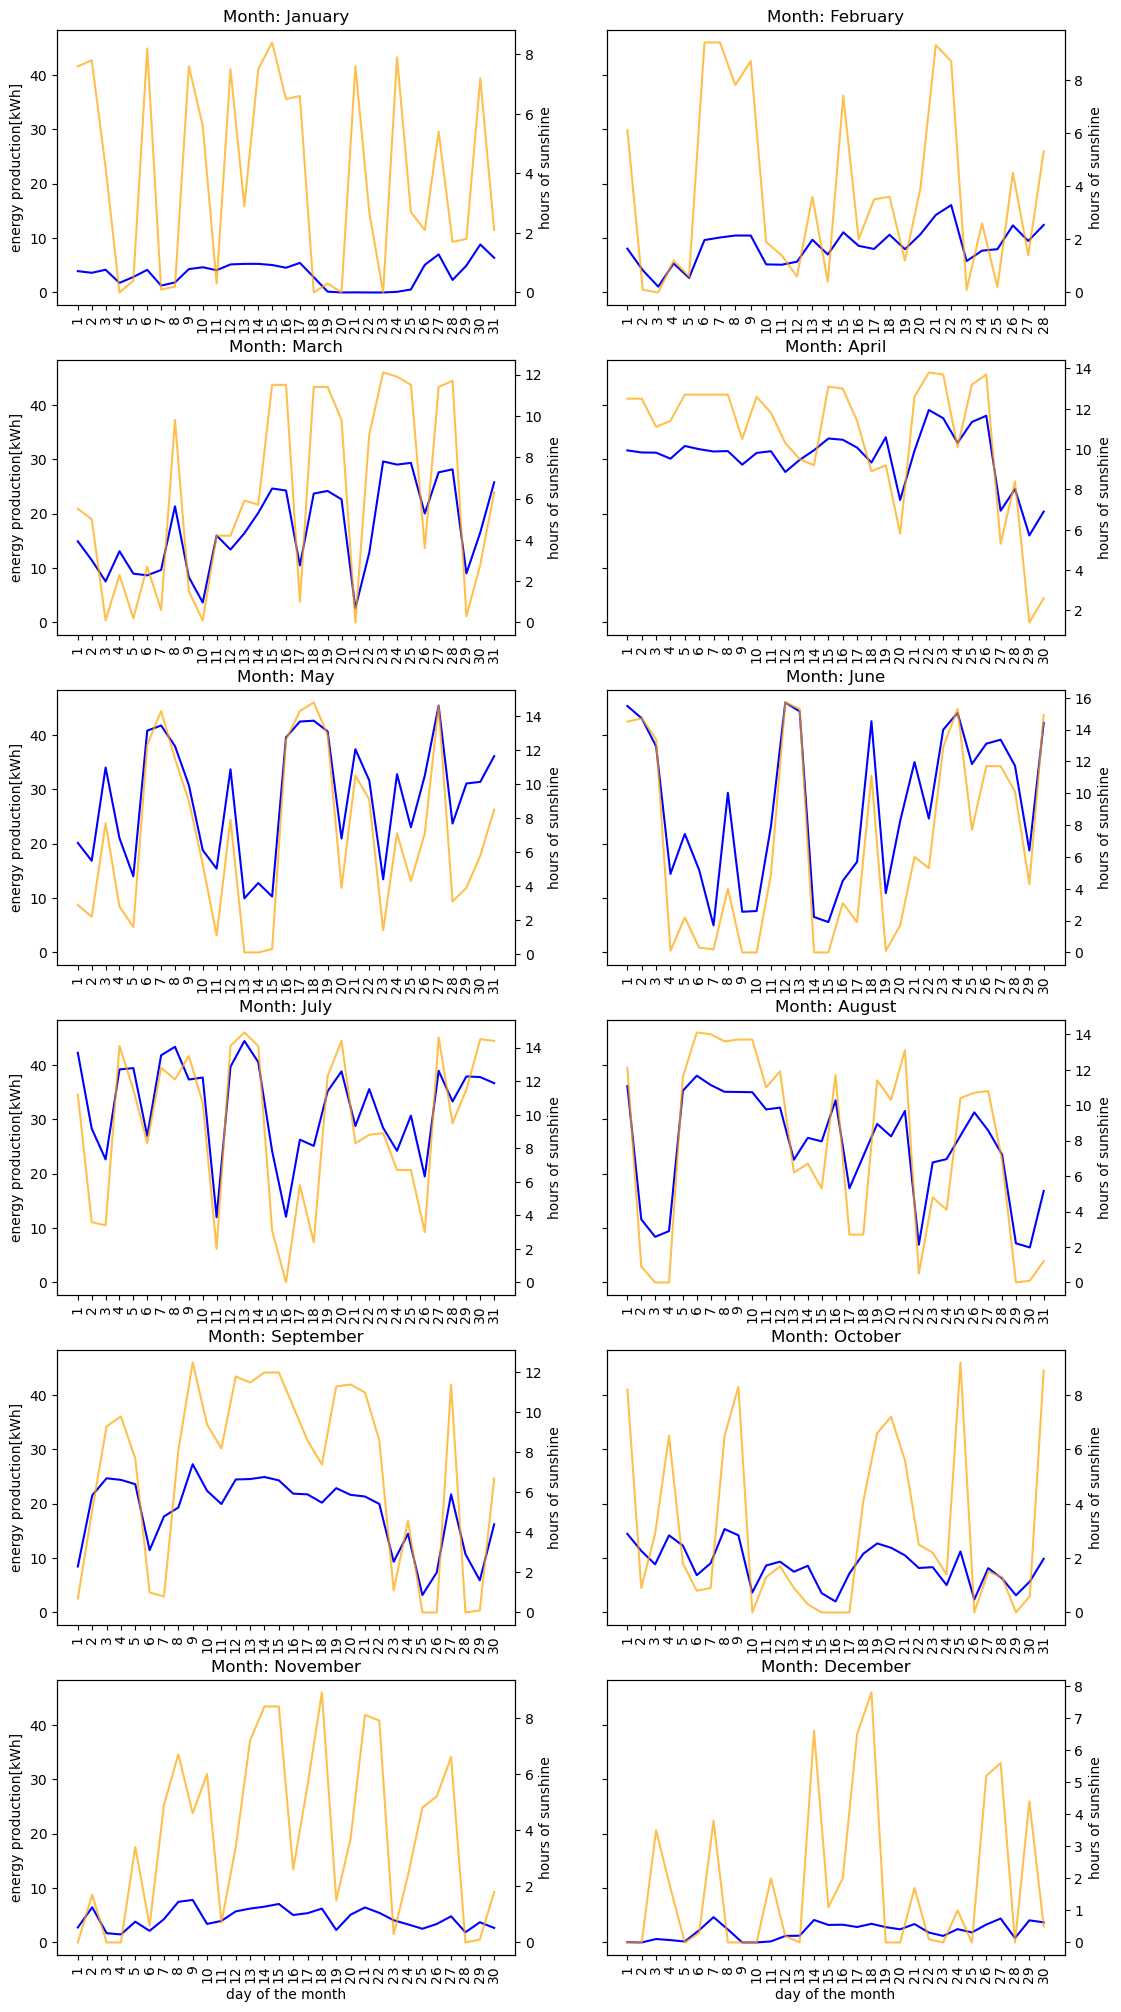

2021


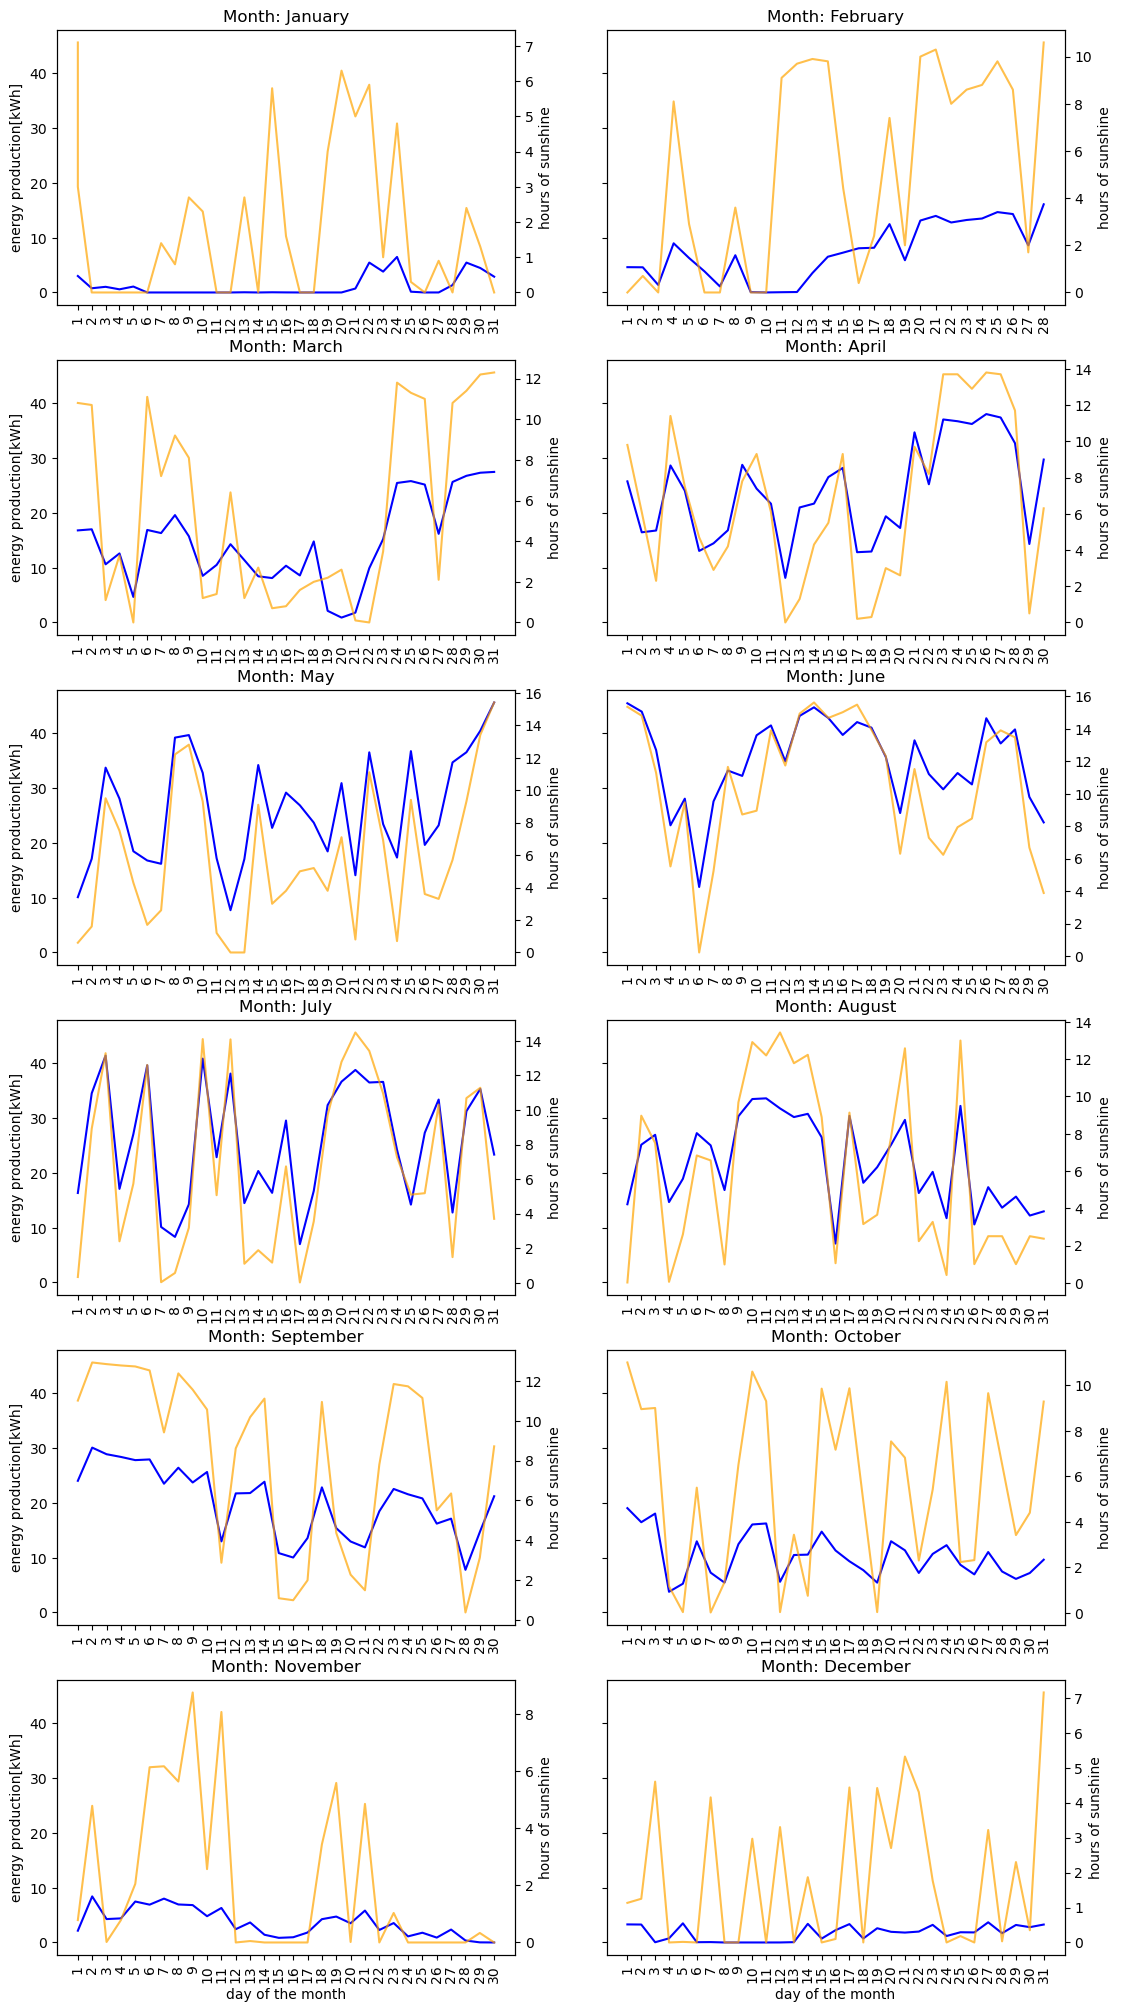

2022


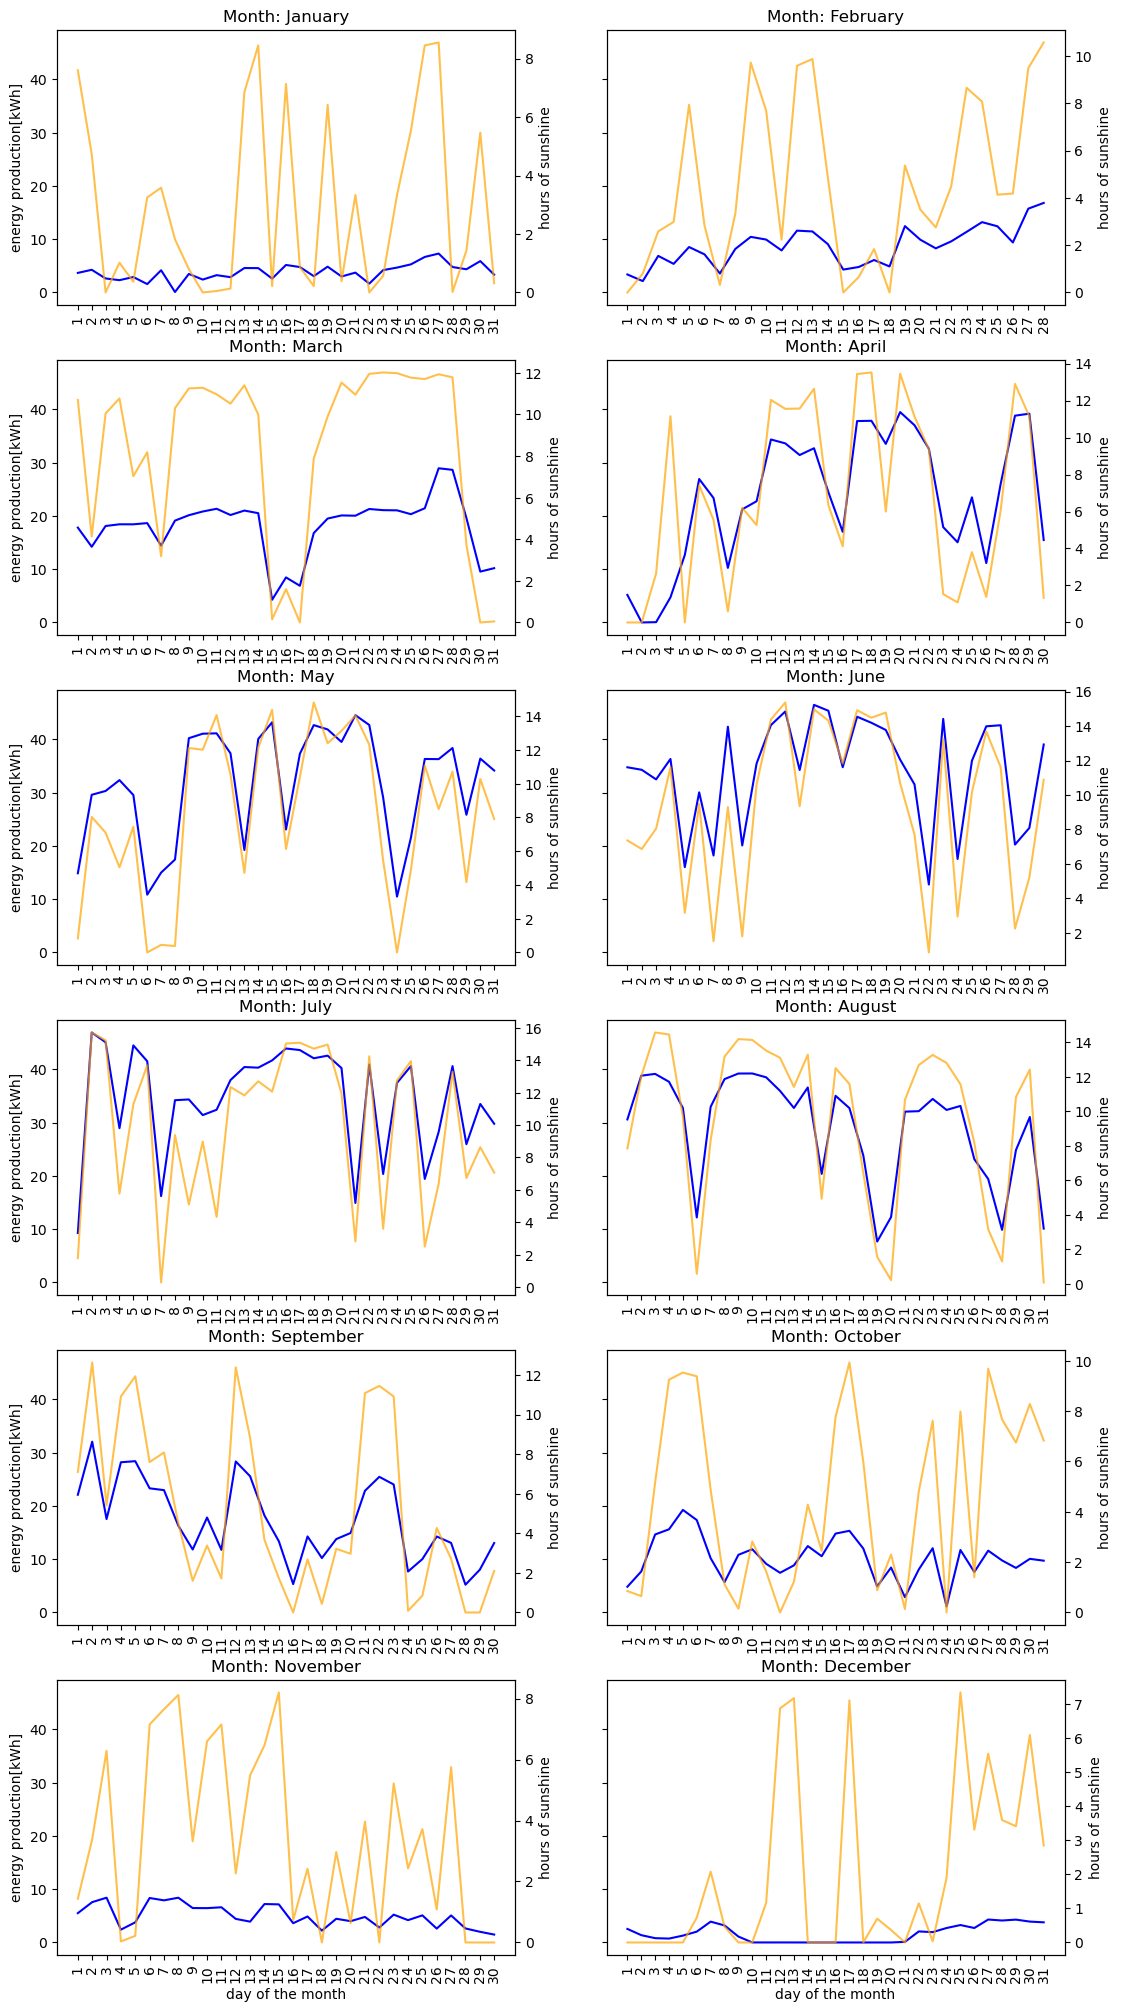

In [10]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
years = [2019, 2020, 2021, 2022]
for year in years:
    print(year)
    fig, axes = plt.subplots(6, 2, figsize=(13,25), sharey=True)
    year_data = data[data["Year"]==year]
    i = 0
    for month in data["Month"].unique():
        ax = axes.flatten()[i]
        ax2 = ax.twinx()
        ax.set_title("Month: " + months[month-1])
        month_data = year_data[year_data["Month"] == month]

        # plot hours of sunshine
        ax2.plot(
            month_data["Datum und Uhrzeit"],
            month_data["SDK"],
            color="orange",
            alpha=0.7
        )
        ax2.set_ylabel("hours of sunshine")


        # plot energy production
        ax.plot(
            month_data["Datum und Uhrzeit"],
            month_data["Gesamtanlage[kWh]"],
            color="blue"
        )
        ax.set_xticklabels(np.arange(len(month_data))+1, rotation=90)
        if i in [0, 2, 4, 6, 8, 10]:
            ax.set_ylabel("energy production[kWh]")
        else:
            ax2.set_ylabel("hours of sunshine")
        i += 1
    
    axes[5,0].set_xlabel("day of the month")
    axes[5,1].set_xlabel("day of the month")
    plt.show()


In summer, the hours of sunshine correspond fairly well to the amount of energy produced. In winter there is little production even on days with many hours of sunshine. Again, we see days of zero production when the modules are probably covered in snow. In winter, production also follows the hours of sunshine, but not as clearly as in summer.

## Production per hour of sunshine

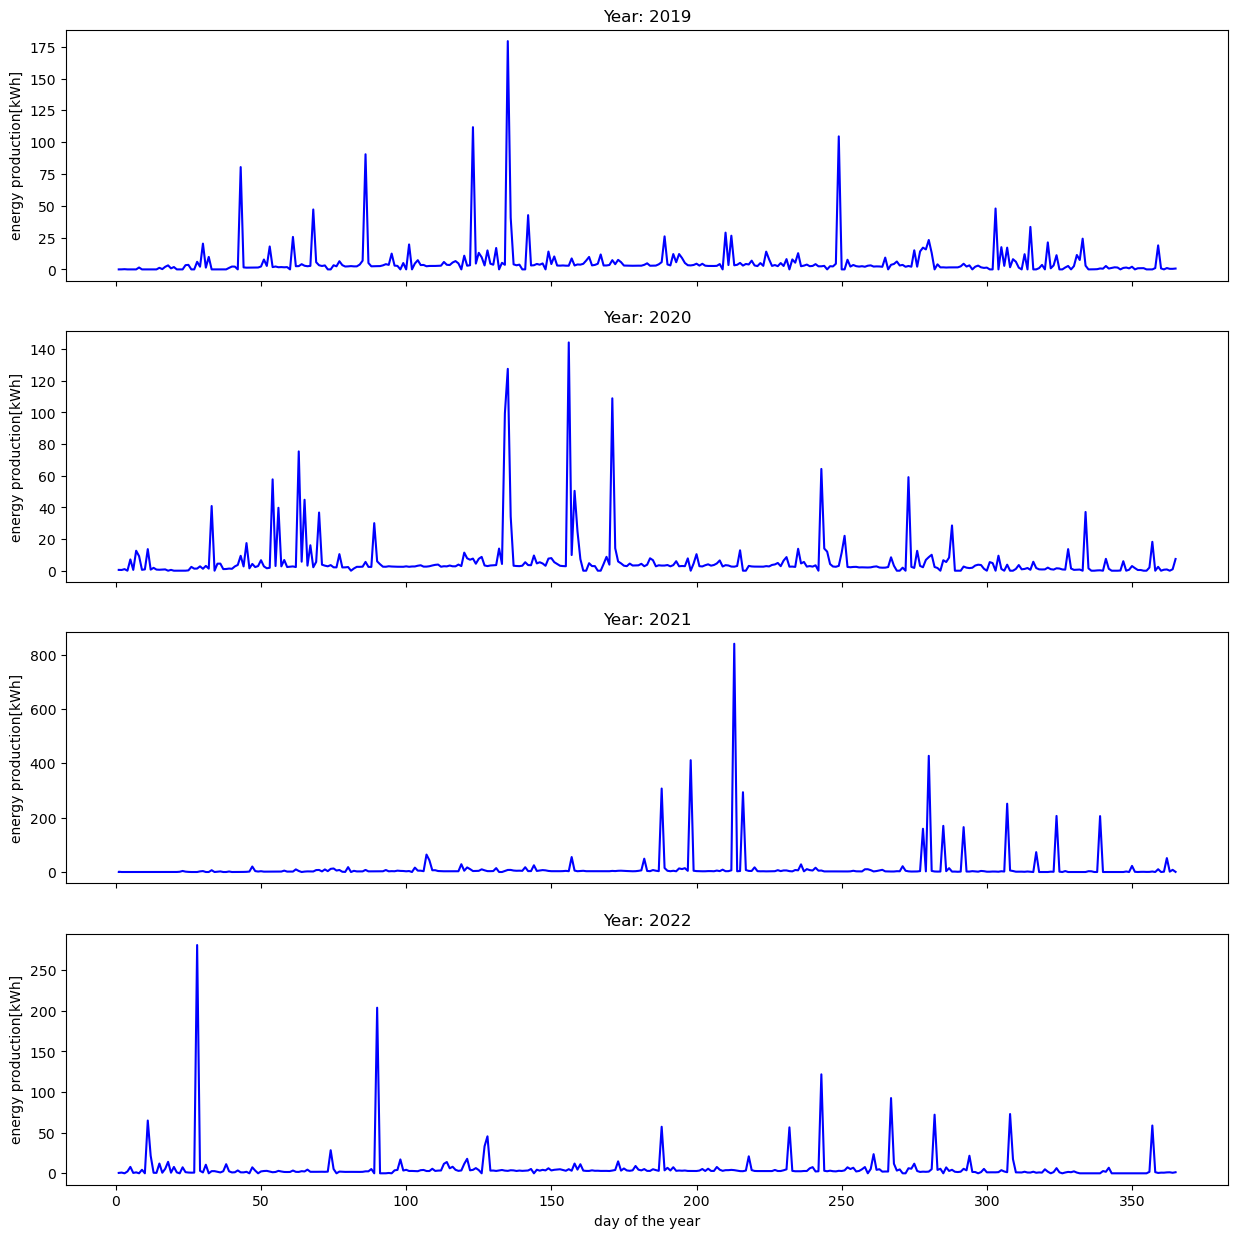

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(15,15), sharex=True)
i = 0
for year in data["Year"].unique():
    ax = axes.flatten()[i]
    ax.set_title("Year: " + str(year))
    year_data = data[data["Year"] == year]

    # plot energy production
    ax.plot(
        year_data["Day of year"],
        # production per hour -> zero if zero hours of sunshine
        np.divide(year_data["Gesamtanlage[kWh]"], year_data["SDK"], out=np.zeros_like(year_data["Gesamtanlage[kWh]"]), where=year_data["SDK"]!=0),
        color="blue"
    )
    ax.set_ylabel("energy production[kWh]")
    i += 1
    
axes[3].set_xlabel("day of the year")
plt.show()

There are some outstanding peaks where a lot of energy is produced per hour. They seem unrealistically high. One reason could be that the weather data is inaccurate because the weather station is several miles away from the PV system location. If there was more sun at the site than at the weather station, the production per hour will be too high and may cause spikes. Therefore, it may be beneficial to use additional weather data and interpolate the sunshine hours to get a more accurate value for the location. This should be investigated further.